In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris 
from sklearn.decomposition import PCA, IncrementalPCA

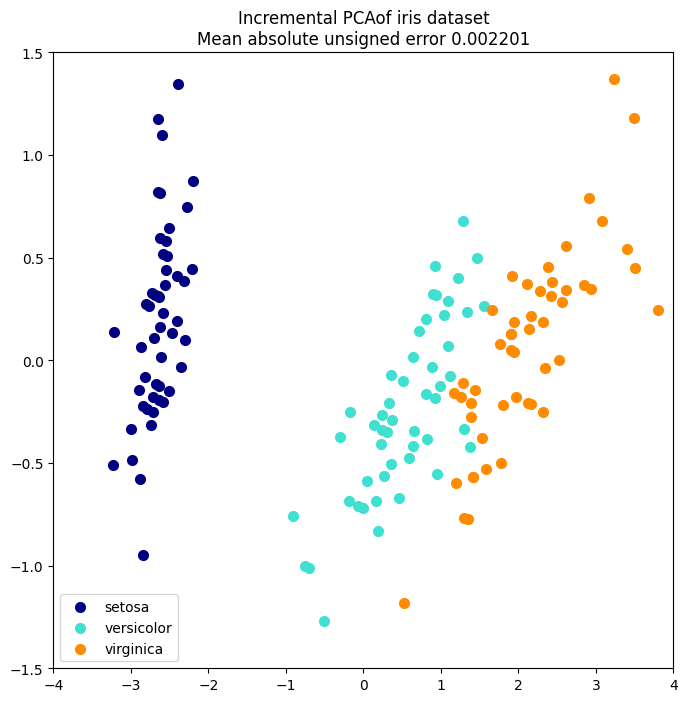

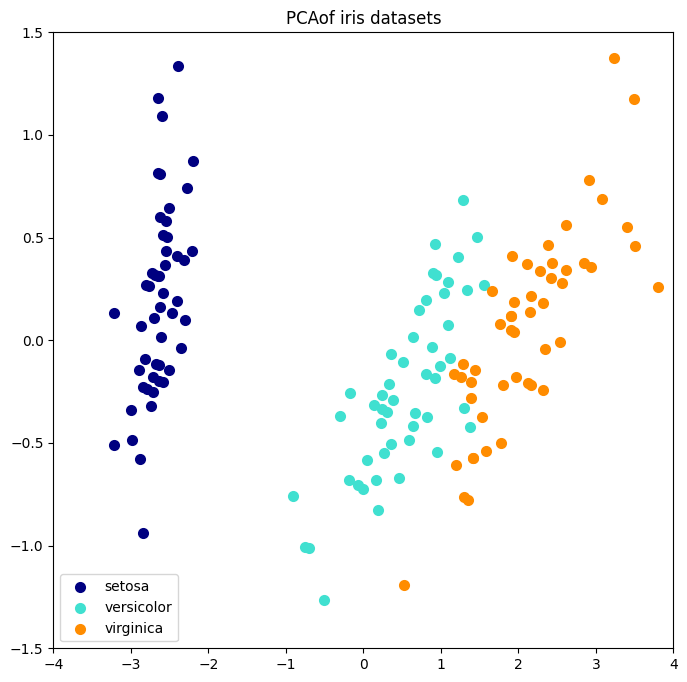

In [2]:
iris = load_iris()
X, y = iris.data, iris.target 

n_components = 2 

ipca = IncrementalPCA(n_components=n_components, batch_size=10)
x_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']
for x_transformed, title in [(x_ipca, 'Incremental PCA'), (x_pca, 'PCA')]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            x_transformed[y == i, 0], 
            x_transformed[y == i, 1], 
            color=color, 
            lw=2, 
            label=target_name
        )
        
    if 'Incremental' in title:
        err = np.abs(np.abs(x_pca) - np.abs(x_ipca)).mean()
        plt.title(title + f'of iris dataset\nMean absolute unsigned error {err:.6f}')
    
    else:
        plt.title(title + 'of iris datasets')
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()